In [1]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import warnings
import random
warnings.filterwarnings("ignore")


In [2]:
btc = pd.read_csv('BTC-USD.csv')
eth = pd.read_csv('ETH-USD.csv')
spy = pd.read_csv('SPY.csv')

In [3]:
spy['Date']

0       2019-05-13
1       2019-05-14
2       2019-05-15
3       2019-05-16
4       2019-05-17
           ...    
1254    2024-05-06
1255    2024-05-07
1256    2024-05-08
1257    2024-05-09
1258    2024-05-10
Name: Date, Length: 1259, dtype: object

## Data preprocessing

### Convert column name to perspective column name

In [4]:
btc.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-12,7203.507324,7503.872070,6815.770996,6972.371582,6972.371582,2.777333e+10
1,2019-05-13,6971.178223,8047.413086,6898.282227,7814.915039,7814.915039,2.867767e+10
2,2019-05-14,7807.884277,8268.712891,7696.391113,7994.416016,7994.416016,3.203145e+10
3,2019-05-15,7989.374512,8216.423828,7899.106934,8205.167969,8205.167969,2.834411e+10
4,2019-05-16,8194.500977,8320.824219,7729.608398,7884.909180,7884.909180,3.316720e+10


In [6]:
#Check for any missing data
print(btc.isna().sum())
print(eth.isna().sum())
print(spy.isna().sum())

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64
Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [7]:
for i in btc.columns:
    if i != 'Date':
        btc['btc' +i] = btc[i]
        btc = btc.drop(i, axis = 1)

In [8]:
for i in eth.columns:
    if i != 'Date':
        eth['eth' +i] = eth[i]
        eth = eth.drop(i, axis = 1)

In [9]:
for i in spy.columns:
    if i != 'Date':
        spy['spy' +i] = spy[i]
        spy = spy.drop(i, axis = 1)

In [10]:
eth.columns

Index(['Date', 'ethOpen', 'ethHigh', 'ethLow', 'ethClose', 'ethAdj Close',
       'ethVolume'],
      dtype='object')

In [11]:
spy.columns

Index(['Date', 'spyOpen', 'spyHigh', 'spyLow', 'spyClose', 'spyAdj Close',
       'spyVolume'],
      dtype='object')

In [12]:
btc.head()

,Date,btcOpen,btcHigh,btcLow,btcClose,btcAdj Close,btcVolume
0,2019-05-12,7203.507324,7503.872070,6815.770996,6972.371582,6972.371582,2.777333e+10
1,2019-05-13,6971.178223,8047.413086,6898.282227,7814.915039,7814.915039,2.867767e+10
2,2019-05-14,7807.884277,8268.712891,7696.391113,7994.416016,7994.416016,3.203145e+10
3,2019-05-15,7989.374512,8216.423828,7899.106934,8205.167969,8205.167969,2.834411e+10
4,2019-05-16,8194.500977,8320.824219,7729.608398,7884.909180,7884.909180,3.316720e+10


In [13]:
eth.head()

,Date,ethOpen,ethHigh,ethLow,ethClose,ethAdj Close,ethVolume
0,2019-05-12,194.163025,201.881485,183.653931,187.325317,187.325317,1.032605e+10
1,2019-05-13,187.417923,205.098267,185.305908,196.846283,196.846283,1.036715e+10
2,2019-05-14,196.738281,217.874649,196.054810,217.148575,217.148575,1.275105e+10
3,2019-05-15,217.010117,247.446594,216.822113,247.153061,247.153061,1.346001e+10
4,2019-05-16,246.941956,275.394440,245.795288,264.010010,264.010010,1.866147e+10


https://realpython.com/pandas-merge-join-and-concat/

In [14]:
### When merged, around 600 or 30% of data got lost
df = pd.merge(btc, eth, on = ["Date"])

In [15]:
df.head()

,Date,btcOpen,btcHigh,btcLow,btcClose,btcAdj Close,btcVolume,ethOpen,ethHigh,ethLow,ethClose,ethAdj Close,ethVolume
0,2019-05-12,7203.507324,7503.872070,6815.770996,6972.371582,6972.371582,2.777333e+10,194.163025,201.881485,183.653931,187.325317,187.325317,1.032605e+10
1,2019-05-13,6971.178223,8047.413086,6898.282227,7814.915039,7814.915039,2.867767e+10,187.417923,205.098267,185.305908,196.846283,196.846283,1.036715e+10
2,2019-05-14,7807.884277,8268.712891,7696.391113,7994.416016,7994.416016,3.203145e+10,196.738281,217.874649,196.054810,217.148575,217.148575,1.275105e+10
3,2019-05-15,7989.374512,8216.423828,7899.106934,8205.167969,8205.167969,2.834411e+10,217.010117,247.446594,216.822113,247.153061,247.153061,1.346001e+10
4,2019-05-16,8194.500977,8320.824219,7729.608398,7884.909180,7884.909180,3.316720e+10,246.941956,275.394440,245.795288,264.010010,264.010010,1.866147e+10


In [16]:
df = pd.merge(df, spy, on = ['Date'])

In [17]:
df.head()

,Date,btcOpen,btcHigh,btcLow,btcClose,btcAdj Close,btcVolume,ethOpen,ethHigh,ethLow,ethClose,ethAdj Close,ethVolume,spyOpen,spyHigh,spyLow,spyClose,spyAdj Close,spyVolume
0,2019-05-13,6971.178223,8047.413086,6898.282227,7814.915039,7814.915039,2.867767e+10,187.417923,205.098267,185.305908,196.846283,196.846283,1.036715e+10,282.420013,283.489990,279.929993,280.859985,259.165955,127290500
1,2019-05-14,7807.884277,8268.712891,7696.391113,7994.416016,7994.416016,3.203145e+10,196.738281,217.874649,196.054810,217.148575,217.148575,1.275105e+10,281.989990,285.100006,281.850006,283.399994,261.509735,77003200
2,2019-05-15,7989.374512,8216.423828,7899.106934,8205.167969,8205.167969,2.834411e+10,217.010117,247.446594,216.822113,247.153061,247.153061,1.346001e+10,281.589996,285.769989,281.359985,285.059998,263.041595,73956400
3,2019-05-16,8194.500977,8320.824219,7729.608398,7884.909180,7884.909180,3.316720e+10,246.941956,275.394440,245.795288,264.010010,264.010010,1.866147e+10,285.839996,289.209991,285.760010,287.700012,265.477631,76749600
4,2019-05-17,7886.925781,7929.145508,7038.124512,7343.895508,7343.895508,3.006664e+10,263.848358,266.979614,227.767426,243.764587,243.764587,1.603755e+10,285.140015,288.600006,285.119995,285.839996,263.761322,100353000


In [18]:
btc.shape

(1828, 7)

In [19]:
spy.shape

(1259, 7)

In [20]:
df.shape

(1259, 19)

In [21]:
# Remove all string value for convertion Date to float
dateColumn = df["Date"]
df["Date"] = df["Date"].str.replace("-",'')
df["Date"] = pd.to_numeric(df['Date'], errors='coerce',downcast="integer")

In [22]:
print(df.dtypes)

Date              int32
btcOpen         float64
btcHigh         float64
btcLow          float64
btcClose        float64
btcAdj Close    float64
btcVolume       float64
ethOpen         float64
ethHigh         float64
ethLow          float64
ethClose        float64
ethAdj Close    float64
ethVolume       float64
spyOpen         float64
spyHigh         float64
spyLow          float64
spyClose        float64
spyAdj Close    float64
spyVolume         int64
dtype: object


In [23]:
df.head(10)

,Date,btcOpen,btcHigh,btcLow,btcClose,btcAdj Close,btcVolume,ethOpen,ethHigh,ethLow,ethClose,ethAdj Close,ethVolume,spyOpen,spyHigh,spyLow,spyClose,spyAdj Close,spyVolume
0,20190513,6971.178223,8047.413086,6898.282227,7814.915039,7814.915039,2.867767e+10,187.417923,205.098267,185.305908,196.846283,196.846283,1.036715e+10,282.420013,283.489990,279.929993,280.859985,259.165955,127290500
1,20190514,7807.884277,8268.712891,7696.391113,7994.416016,7994.416016,3.203145e+10,196.738281,217.874649,196.054810,217.148575,217.148575,1.275105e+10,281.989990,285.100006,281.850006,283.399994,261.509735,77003200
2,20190515,7989.374512,8216.423828,7899.106934,8205.167969,8205.167969,2.834411e+10,217.010117,247.446594,216.822113,247.153061,247.153061,1.346001e+10,281.589996,285.769989,281.359985,285.059998,263.041595,73956400
3,20190516,8194.500977,8320.824219,7729.608398,7884.909180,7884.909180,3.316720e+10,246.941956,275.394440,245.795288,264.010010,264.010010,1.866147e+10,285.839996,289.209991,285.760010,287.700012,265.477631,76749600
4,20190517,7886.925781,7929.145508,7038.124512,7343.895508,7343.895508,3.006664e+10,263.848358,266.979614,227.767426,243.764587,243.764587,1.603755e+10,285.140015,288.600006,285.119995,285.839996,263.761322,100353000
5,20190520,8196.923828,8200.967773,7678.781738,7978.309082,7978.309082,2.384340e+10,261.267487,261.551270,241.803650,251.864410,251.864410,1.083454e+10,284.059998,285.959991,283.119995,283.950012,262.017273,62877600
6,20190521,7977.969238,8062.167969,7843.339844,7963.327637,7963.327637,2.512725e+10,251.647842,262.107544,248.196304,255.215881,255.215881,1.154505e+10,285.829987,286.929993,285.549988,286.510010,264.379578,46847100
7,20190522,7956.291992,7997.612305,7615.987305,7680.066406,7680.066406,2.471947e+10,254.995316,258.801849,242.730484,244.698914,244.698914,9.818257e+09,285.450012,286.690002,285.100006,285.630005,263.567505,49482500
8,20190523,7677.269043,7943.791504,7533.196777,7881.846680,7881.846680,2.445711e+10,244.665115,247.616638,233.793091,245.965668,245.965668,1.067166e+10,283.160004,283.209991,280.570007,282.140015,260.347168,98733800
9,20190524,7881.695313,8140.719727,7824.448730,7987.371582,7987.371582,2.591913e+10,245.987091,255.259338,243.240097,249.484985,249.484985,9.929433e+09,283.739990,284.200012,282.089996,282.779999,260.937653,55268100


Correlation Coefficient: 0.9148311012758733


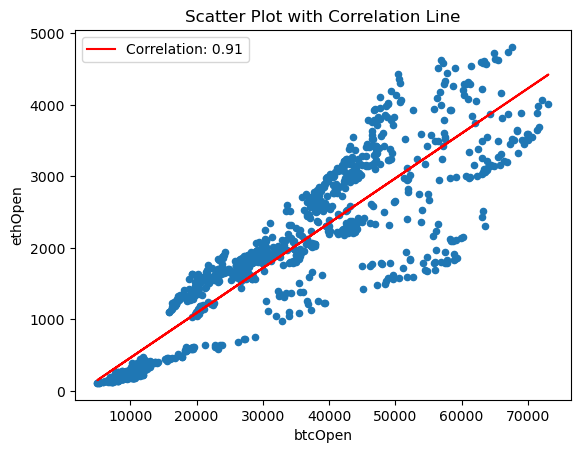

In [24]:
# Create a scatter plot
df.plot.scatter(x = 'btcOpen', y = 'ethOpen');

correlation = df['btcOpen'].corr(df['ethOpen'])
print('Correlation Coefficient: ' + str(correlation))

x = df['btcOpen']
y = df['ethOpen']

# Calculate the correlation coefficient
coefficients = np.polyfit(x, y, 1)
poly = np.poly1d(coefficients)
plt.plot(x, poly(x), color='red', linestyle='-', label=f'Correlation: {correlation:.2f}')

# Add labels and legend
plt.xlabel('btcOpen')
plt.ylabel('ethOpen')
plt.title('Scatter Plot with Correlation Line')
plt.legend()

# Show the plot
plt.show()

Correlation Coefficient: 0.8518652942019918


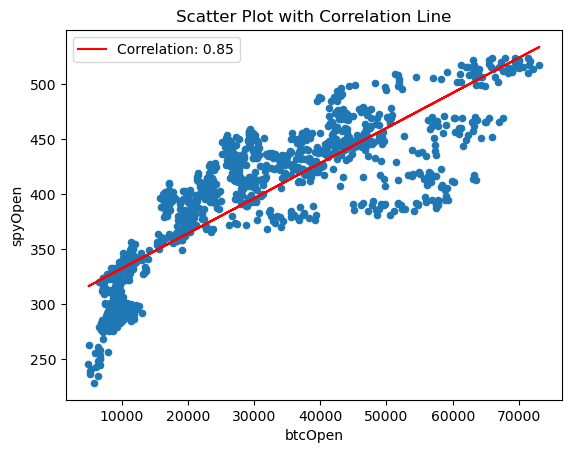

In [25]:
# Create a scatter plot
df.plot.scatter(x = 'btcOpen', y = 'spyOpen');

correlation = df['btcOpen'].corr(df['spyOpen'])
print('Correlation Coefficient: ' + str(correlation))

x = df['btcOpen']
y = df['spyOpen']

# Calculate the correlation coefficient
coefficients = np.polyfit(x, y, 1)
poly = np.poly1d(coefficients)
plt.plot(x, poly(x), color='red', linestyle='-', label=f'Correlation: {correlation:.2f}')

# Add labels and legend
plt.xlabel('btcOpen')
plt.ylabel('spyOpen')
plt.title('Scatter Plot with Correlation Line')
plt.legend()

# Show the plot
plt.show()

### Utils for updating data sets 

In [26]:
class Utils:
    
    def _updateTrainingData(self, x_train):
        for i in x_train.columns:
            if i != 'Date':
                x_train['yesterday_' +i] = x_train[i]
                x_train['twoDaysAgo_' +i] = x_train[i]
                x_train['threeDaysAgo_' +i] = x_train[i]
                x_train['fourDaysAgo_' +i] = x_train[i]
                x_train['fiveDaysAgo_' +i] = x_train[i]
                x_train['sixDaysAgo_' +i] = x_train[i]
                x_train['sevenDaysAgo_' +i] = x_train[i]
                x_train['yesterday_' +i] = x_train['yesterday_' +i].shift(1)
                x_train['twoDaysAgo_' +i] = x_train['twoDaysAgo_' +i].shift(2)
                x_train['threeDaysAgo_' +i] = x_train['threeDaysAgo_' +i].shift(3)
                x_train['fourDaysAgo_' +i] = x_train['fourDaysAgo_' +i].shift(4)
                x_train['fiveDaysAgo_' +i] = x_train['fiveDaysAgo_' +i].shift(5)
                x_train['sixDaysAgo_' +i] = x_train['sixDaysAgo_' +i].shift(6)
                x_train['sevenDaysAgo_' +i] = x_train['sevenDaysAgo_' +i].shift(7)
                x_train = x_train.drop(i, axis = 1)
        return x_train
    
    def _updateDate(self, x_train):
        x_train["Date"]
        x_train['Date'] = x_train['Date'].astype(str)
        
        for k in range (len(x_train["Date"])):
            size = len(x_train["Date"][k])
            string = x_train["Date"][k]
            substring_to_remove = ".0"
            x_train.loc[k]['Date'] = string.replace(substring_to_remove, "")

        for k in range (len(x_train["Date"])):
            size = len(x_train["Date"][k])
            string = x_train["Date"][k]
            x_train.loc[k]['Date'] = string[:4] + "-" + string[4:]
            #print(result)

        for k in range (len(x_train["Date"])):
            size = len(x_train["Date"][k])
            string = x_train["Date"][k]
            x_train.loc[k]['Date'] = string[:7] + "-" + string[7:]
        
        return x_train['Date']
    
    def _replaceNanY(self, y_train):
        column_means_7days =  y_train.tail(7).mean()
        df_filled = y_train_btcHigh.fillna(column_means_7days)
        y_train = df_filled
        
        return y_train
    
    def _replaceNanX(x_train):
        column_means = x_train.mean()
        df_filled = x_train.fillna(column_means)
        x_train = df_filled
        
        return x_train
    
    def _newTrainingData(new_row, x_train):
        index = len(x_train)
        x_train.loc[index] = new_row
        x_train_temp = x_train
        return x_train_temp

    
    def _newTrainLabel(self, y_train):
        column_means_7days = y_train.tail(7).mean()
        new_row = pd.Series({'btcHigh': column_means_7days})
        y_train_temp = y_train.append(new_row, ignore_index=True)
        return y_train_temp
    
    
    

### Pedictor class to call predictor model

In [27]:
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression

class Predictor: 
    
    model = LinearRegression()
    utils = Utils()
    X_ = []
    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        Predictor.X_ = self.X
    
    def _split(X, y, ratio, random_state):
        header = X.columns
        # remove header for shuffling 
        x_data = X.values

        random.seed(random_state)
        train_ratio = ratio
        test_ratio = 1 - train_ratio
        
        total_data_sample = len(X)
        train_samples = int(total_data_sample * train_ratio)
        test_samples = total_data_sample - train_samples

        random.shuffle(x_data)
        shuffled_data = pd.DataFrame(x_data, columns=header)

        train_data = shuffled_data.head(train_samples)
        test_data = shuffled_data.head(test_samples)
        
        return train_data, test_data
    
    def _predictWithLinearRegression(self, date=None):
        
        if (date!=None): 
            self.X = Utils._newTrainingData({'Date': date}, self.X)
            Predictor.X_ = self.X
            
        train_data, test_data, = Predictor._split(self.X, self.y, ratio=0.7, random_state=123 )
       
        X_train_btcHigh = train_data.drop(columns=['btcHigh'])
        X_train_btcHigh = Utils._replaceNanX(X_train_btcHigh)
        y_train_btcHigh = train_data['btcHigh']
        Predictor.model.fit(X_train_btcHigh, y_train_btcHigh)
        y_pred_btcHigh = Predictor.model.predict(X_train_btcHigh)
        
        # Predict Low
        X_train_btcLow = train_data.drop(columns=['btcLow'])
        X_train_btcLow = Utils._replaceNanX(X_train_btcLow)
        y_train_btcLow = train_data['btcLow']
        Predictor.model.fit(X_train_btcLow, y_train_btcLow)
        y_pred_btcLow = Predictor.model.predict(X_train_btcLow)
        
        # Predict Open
        X_train_btcOpen = train_data.drop(columns=['btcOpen'])
        X_train_btcOpen = Utils._replaceNanX(X_train_btcOpen)
        y_train_btcOpen = train_data['btcOpen']
        Predictor.model.fit(X_train_btcOpen, y_train_btcOpen)
        y_pred_btcOpen = Predictor.model.predict(X_train_btcOpen)
        
        # Predict Close
        X_train_btcClose = train_data.drop(columns=['btcClose'])
        X_train_btcClose = Utils._replaceNanX(X_train_btcClose)
        y_train_btcClose = train_data['btcClose']
        Predictor.model = LinearRegression()
        Predictor.model.fit(X_train_btcClose, y_train_btcClose)
        y_pred_btcClose = Predictor.model.predict(X_train_btcClose)
    
        y_pred_btcHigh = pd.DataFrame(y_pred_btcHigh)
        y_pred_btcLow = pd.DataFrame(y_pred_btcLow)
        y_pred_btcOpen = pd.DataFrame(y_pred_btcOpen)
        y_pred_btcClose = pd.DataFrame(y_pred_btcClose)
        
        self.y_btcHigh_pred = y_pred_btcHigh 
        self.x_btcHigh_train = X_train_btcHigh 
        self.y_btcHigh_train = y_train_btcHigh 
        
        y_pred_btcHigh_ = y_pred_btcHigh.iloc[-1:].iloc[-1:].values.flatten()
        y_pred_btcLow_ = y_pred_btcLow.iloc[-1:].iloc[-1:].values.flatten()
        y_pred_btcOpen_ = y_pred_btcOpen.iloc[-1:].iloc[-1:].values.flatten()
        y_pred_btcClose_ = y_pred_btcClose.iloc[-1:].iloc[-1:].values.flatten()
        
        
        return X, y_pred_btcHigh_[0], y_pred_btcLow_[0], y_pred_btcOpen_[0],y_pred_btcClose_[0]

        

###  Predict the BTC future high price

In [28]:
from datetime import datetime, timedelta
today = datetime.now().date()

tomorrow = (today + timedelta(days=1)).strftime('%Y-%m-%d')
secondDay = (today + timedelta(days=2)).strftime('%Y-%m-%d')

X = df
y = df['btcHigh']
predictor = Predictor(X,y)

In [29]:
#The is appended in the XO without the prediction for high, low, open, close
X0, predHigh, predLow, predOpen, predClose  = predictor._predictWithLinearRegression(tomorrow)

#So we'll need to create a new row for the predicted high, low, open, close
new_row = {'Date': tomorrow, 'btcHigh':predHigh, 'btcLow':predLow, 'btcOpen':predOpen, 'btcClose':predClose }

#Drop the last row because it onlt contains the date
X0.drop(X0.index[-1], inplace=True)

#After dropping the last row append the prediction
i = len(X0)
X0.loc[i] = new_row

In [30]:
#Drop the other columns only keep 'Date', 'btcHigh', 'btcLow', 'btcOpen', 'btcClose'
columns_to_keep = ['Date', 'btcHigh', 'btcLow', 'btcOpen', 'btcClose']    # Specify the columns you want to keep
#Drop the other columns
columns_to_drop = [col for col in X0.columns if col not in columns_to_keep]
X0.drop(columns=columns_to_drop, inplace=True)
X0

,Date,btcOpen,btcHigh,btcLow,btcClose
0,20190513,6971.178223,8047.413086,6898.282227,7814.915039
1,20190514,7807.884277,8268.712891,7696.391113,7994.416016
2,20190515,7989.374512,8216.423828,7899.106934,8205.167969
3,20190516,8194.500977,8320.824219,7729.608398,7884.909180
4,20190517,7886.925781,7929.145508,7038.124512,7343.895508
...,...,...,...,...,...
1255,20240507,63162.761719,64390.457031,62285.980469,62334.816406
1256,20240508,62332.640625,62986.085938,60877.128906,61187.941406
1257,20240509,61191.199219,63404.914063,60648.074219,63049.960938
1258,20240510,63055.191406,63446.742188,60208.781250,60792.777344
